<a href="https://colab.research.google.com/github/VISHAL2077/Generative_AI_2025/blob/main/2303a52077_Assignment11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adadelta
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/drive/MyDrive/train-20250404T145129Z-001/train'
val_dir = '/content/drive/MyDrive/validation-20250404T145130Z-001/validation'

img_size = (128, 128)
batch_size = 32
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
def build_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

model = build_model()
model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=epochs, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.6963 - val_accuracy: 0.7500 - val_loss: 0.6846
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step - accuracy: 0.5000 - loss: 0.6952 - val_accuracy: 0.7500 - val_loss: 0.6847
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step - accuracy: 0.5000 - loss: 0.6940 - val_accuracy: 0.7500 - val_loss: 0.6848
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step - accuracy: 0.5000 - loss: 0.6929 - val_accuracy: 0.7500 - val_loss: 0.6849
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6850
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step - accuracy: 0.5000 - loss: 0.6908 - val_accuracy: 0.5000 - val_loss: 0.6851
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6897 - val_accuracy: 0.5000 - val_loss: 0.6852
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.6886 - val_accuracy: 0.5000 - val_loss: 0.6853
Epoc

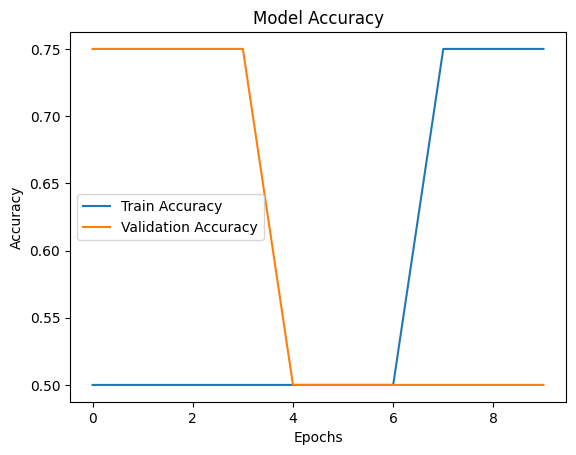

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

def build_alternative_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

alt_model = build_alternative_model()
alt_model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])
alt_history = alt_model.fit(train_data, epochs=epochs, validation_data=val_data)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2500 - loss: 1.3205 - val_accuracy: 0.5000 - val_loss: 0.7016
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.5552 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 2.1146 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.5510 - val_accuracy: 0.5000 - val_loss: 0.7009
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step - accuracy: 0.2500 - loss: 1.0968 - val_accuracy: 0.5000 - val_loss: 0.7005
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step - accuracy: 1.0000 - loss: 0.1156 - val_accuracy: 0.5000 - val_loss: 0.7004
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8305 - val_accuracy: 0.5000 - val_loss: 0.7000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step - accuracy: 1.0000 - loss: 0.4062 - val_accuracy: 0.5000 - val_loss: 0.6999
Epo

Original Model Final Training Accuracy: 0.75
Original Model Final Validation Accuracy: 0.5
Alternative Model Final Training Accuracy: 0.5
Alternative Model Final Validation Accuracy: 0.5


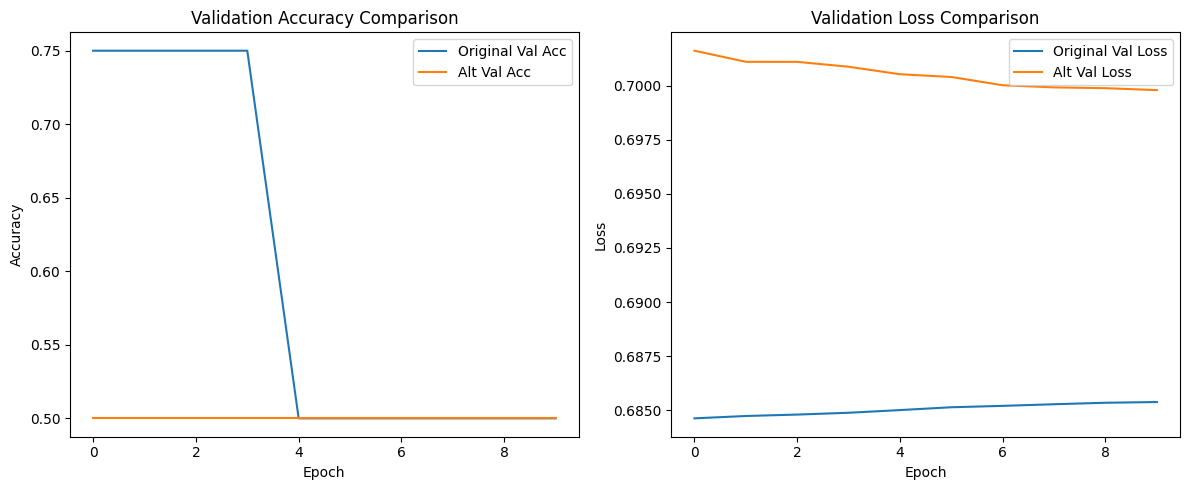

In [ ]:
print("Original Model Final Training Accuracy:", history.history['accuracy'][-1])
print("Original Model Final Validation Accuracy:", history.history['val_accuracy'][-1])

print("Alternative Model Final Training Accuracy:", alt_history.history['accuracy'][-1])
print("Alternative Model Final Validation Accuracy:", alt_history.history['val_accuracy'][-1])

def compare_histories(original, alternative):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(original.history['val_accuracy'], label='Original Val Acc')
    plt.plot(alternative.history['val_accuracy'], label='Alt Val Acc')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(original.history['val_loss'], label='Original Val Loss')
    plt.plot(alternative.history['val_loss'], label='Alt Val Loss')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

compare_histories(history, alt_history)

In [ ]:
if alt_history.history['val_accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("✅ Alternative model performs better on validation data.")
else:
    print("✅ Original model performs better on validation data.")

✅ Original model performs better on validation data.
